# Homework 5 - ADM

Group 26: Ahmed Hamido, Alessio Barboni, Alex Onofri

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Ex. 1

In [ ]:
import pandas as pd
import pickle

In [ ]:
colnames=['u', 'v', 't'] 
a2q= pd.read_csv('/content/drive/MyDrive/adm_hw5/sx-stackoverflow-a2q.txt', names=colnames, sep=" ", header=None)
c2a= pd.read_csv('/content/drive/MyDrive/adm_hw5/sx-stackoverflow-c2a.txt', names=colnames, sep=" ", header=None)
c2q= pd.read_csv('/content/drive/MyDrive/adm_hw5/sx-stackoverflow-c2q.txt', names=colnames, sep=" ", header=None)

In [ ]:
# timestamp conversion in date
a2q_time = pd.to_datetime(a2q.iloc[:,2],unit="s").dt.strftime("%Y/%m/%d")
a2q["t"]=a2q_time
c2a_time = pd.to_datetime(c2a.iloc[:,2],unit="s").dt.strftime("%Y/%m/%d")
c2a["t"]=c2a_time
c2q_time = pd.to_datetime(c2q.iloc[:,2],unit="s").dt.strftime("%Y/%m/%d")
c2q["t"]=c2q_time

In [ ]:
# save new files csv updated with conversion from timestamp to date
a2q.to_csv('a2q.csv', index=False)
c2a.to_csv('c2a.csv', index=False)
c2q.to_csv('c2q.csv', index=False)

In [ ]:
# open
a2q = pd.read_csv('/content/drive/MyDrive/adm_hw5/a2q.csv')
c2a = pd.read_csv('/content/drive/MyDrive/adm_hw5/c2a.csv')
c2q = pd.read_csv('/content/drive/MyDrive/adm_hw5/c2q.csv')

Select just an interval in the datasets to make them less heavy

In [ ]:
end_date = dt.strptime("2012/12/31","%Y/%m/%d")
a2q_interval = a2q[a2q["t"].apply(lambda t: dt.strptime(t,"%Y/%m/%d")<=end_date)]
c2a_interval = c2a[c2a["t"].apply(lambda t: dt.strptime(t,"%Y/%m/%d")<=end_date)]
c2q_interval = c2q[c2q["t"].apply(lambda t: dt.strptime(t,"%Y/%m/%d")<=end_date)]

In [ ]:
# Save the new datasets (2008-2012)
a2q_interval.to_csv('/content/drive/MyDrive/adm_hw5/a2q_2008_2012.csv', index=False)
c2a_interval.to_csv('/content/drive/MyDrive/adm_hw5/c2a_2008_2012.csv', index=False)
c2q_interval.to_csv('/content/drive/MyDrive/adm_hw5/c2q_2008_2012.csv', index=False)

In [ ]:
# open
a2q_interval = pd.read_csv('/content/drive/MyDrive/adm_hw5/a2q_2008_2012.csv')
c2a_interval = pd.read_csv('/content/drive/MyDrive/adm_hw5/c2a_2008_2012.csv')
c2q_interval = pd.read_csv('/content/drive/MyDrive/adm_hw5/c2q_2008_2012.csv')

#### Create graphs

Structure of the graph (dictionary):

{node:{node_connected:[weight,time],..]}} where:

* weight: 1/number of connections (times we have the tuple (u,v) in the data) --> 1/len (time)
* time: times of connection (list)

In [ ]:
def create_graph(dt):
  graph=dict()
  for index, row in dt.iterrows():
    u = row['u']
    v = row['v']
    time = row['t']
    # if node is in dict
    if u in graph:
      # if node_connected is in dict
      if v in graph[u]:
        # increment the weight and add the time
        ### graph[u][v][0]+=1 (previous method)
        graph[u][v][1].append(time)
        graph[u][v][0]= 1/len(graph[u][v][1]) # weight as the reciprocal of # connections
      # if node_connected is not in dict
      else:
        # create the key with value the list of attributes (weight,time)
        graph[u][v] = [1,[time]]
    # if node is not in dict
    else:
      # create the dict to set as value
      val= {v:[1,[time]]}
      # create the key and set the dict previously created as value
      graph[u] = val
  return graph

Create graphs and save them

In [ ]:
a2q_graph = create_graph(a2q_interval)
c2a_graph = create_graph(c2a_interval)
c2q_graph = create_graph(c2q_interval)

In [ ]:
file_to_write = open("/content/drive/MyDrive/adm_hw5/a2q_graph.pickle", "wb")
pickle.dump(a2q_graph, file_to_write)
file_to_write = open("/content/drive/MyDrive/adm_hw5/c2a_graph.pickle", "wb")
pickle.dump(c2a_graph, file_to_write)
file_to_write = open("/content/drive/MyDrive/adm_hw5/c2q_graph.pickle", "wb")
pickle.dump(c2q_graph, file_to_write)

In [ ]:
file_to_read = open("/content/drive/MyDrive/adm_hw5/a2q_graph.pickle", "rb")
a2q_graph = pickle.load(file_to_read)
file_to_read = open("/content/drive/MyDrive/adm_hw5/c2a_graph.pickle", "rb")
c2a_graph = pickle.load(file_to_read)
file_to_read = open("/content/drive/MyDrive/adm_hw5/c2q_graph.pickle", "rb")
c2q_graph = pickle.load(file_to_read)

#### Merge graphs

In [ ]:
def merge_graphs(g1,g2):
  for node in g2.keys():
    dic = g2[node]
    # if the node is already in g1
    if node in g1:
      # iterate on all connected_nodes
      for connected_node in dic.keys():
        # if the connected node is already in the dict of the node
        if connected_node in g1[node]:
          # update the weigth and times:
          ##g1[node][connected_node][0]+=dic[connected_node][0]
          g1[node][connected_node][1]+=dic[connected_node][1]
          g1[node][connected_node][0] = 1/len(g1[node][connected_node][1])
        else:
          # create the key for the connected_node
          g1[node][connected_node] = dic[connected_node]
    else:
      # create the dictionary for the node
      g1[node] = dic
  return g1
          

In [ ]:
merge = merge_graphs(a2q_graph,c2a_graph)

In [ ]:
merge = merge_graphs(merge,c2q_graph)

## Ex. 2

#### General function that interact with users and receive the index of the functionality to run

In [ ]:
index_func = input('Insert the index of the functionality you want to excute \n1 - Get the overall features of the graph\n2 - Find the best users!\n3 - Shortest Ordered Route\n4 - Disconnecting graphs\n\n')
if index_func == "1":
  input = input('Insert the following information:\n- Name of the graph (a2q or c2a or c2q) \n\n')
  # call functionality 1 with arguments taken
  functionality_1(input)
if index_func == "2":
  input = input('Insert the following information separated by space:\n- User/node\n- Interval of time\n- One of the following metrics: Betweeness, PageRank, ClosenessCentrality, DegreeCentrality \n\n')
  input = input.split(" ")
  # call functionality 2 with arguments taken
  user = input[0]
  start = input[1][0]
  end = input[1][1]
  metric = input[2]
  listOfNodes = list_of_users(merge)
  funcTwo(user,start,end,metric,listOfNodes)
if index_func == "3":
  input = input('Insert the following information separated by space:\n- Interval of time\n- Sequence of users p = [p_2, ..., p_n-1]\n- Initial user p_1 and an end user p_n\n\n')
  input = input.split(" ")
  interval = input[0]
  start_node = input[2]
  end_node = input[3]
  users = input[1]
  functionality_3(merge,interval,start_node,end_node,users)
if index_func == "4":
  input = input('Insert the following information:\n- Interval of time\n\n)
  # call functionality 4 with arguments taken
  functionality_4_single(input)

### Functionality 1 - Get the overall features of the graph

#### Whether the graph is directed or not

In [ ]:
## To check if is directed we see if there are two edges between two nodes and they have 2 different weights 
## --> this means that the two edges are different and the graph is directed
def is_graph_directed(graph):
  for node in graph:
      for connected_node in graph[node]:
          if connected_node!=node and connected_node in graph:
                if node in graph[connected_node]:
                  if graph[node][connected_node][0] != graph[connected_node][node][0]:
                    return True
  return False

#### Number of users

In [ ]:
def number_users(graph):
  # Listing all connected nodes (v) per each node (u).
  v_per_u = [set(graph[i].keys()) for i in graph.keys()]
  # Total connected nodes (v).
  v_nodes = set.union(*v_per_u)
  # Total nodes in the entire graph (u union v).
  all_nodes = set(graph.keys()).union(v_nodes)
  return len(all_nodes)

#### Number of answers/comments

In [ ]:
## Number of answers/comments correspond to the number of edges 
def number_interactions(graph):
  tot_edges=0

  # Loop through each node u
  for u in graph:
      # Loop through each connected node v that is connected to the node u.
      for v in graph[u]:
          # add the number of links between nodes u and v.
          tot_edges+=(1/graph[u][v][0])
  return tot_edges

#### Average number of links per user

In [ ]:
def average_links(graph):
  tot_edges = number_interactions(graph)
  return tot_edges/len(graph.keys())

#### Density degree of the graph
Graph density = no of edges / total no of possible edges.

In directed graph total no of possible edges is $$ |v|*|v-1| $$
In undirected graph total no of possible edges is $$ \frac{|v|*|v-1|}{2} $$

For Undirected Graphs:
$$ Density = \frac{2|E|}{|V|(|V| - 1)} $$

For Directed Graphs:
$$ Density = \frac{|E|}{|V|(|V| - 1)} $$

where |E| is the number of edges and |V| is the number of nodes in the graph.

In [ ]:
def get_density(graph):
  is_directed = is_graph_directed(graph)
  edges_num = number_interactions(graph)
  nodes_num = number_users(graph)

  if not is_directed:
      graph_density = (2*edges_num)/(nodes_num*(nodes_num-1))
  else:
      graph_density = edges_num/(nodes_num*(nodes_num-1))
      
  return graph_density

#### Whether the graph is sparse or dense.

- Dense graph is a graph in which the number of edges is close to the maximal number of edges. 
- Sparse graph is a graph in which the number of edges is close to the minimal number of edges.

Maximum Number of Edges:
- In directed graph: $$ |v|*|v-1| $$
- In undirected graph: $$ \frac{|v|*|v-1|}{2} $$

Minimum Number of Edges: $$ |v-1| $$

where |V| is the number of nodes in the graph.

In [ ]:
def is_graph_sparse(graph):
  is_directed = is_graph_directed(graph)
  nodes_num = number_users(graph)
  edges_num = number_interactions(graph)

  if not is_directed:
      max_edge_num = nodes_num*(nodes_num-1) / 2
  else:
      max_edge_num = nodes_num*(nodes_num-1)
      
  min_edge_num = nodes_num-1
  if edges_num - min_edge_num < max_edge_num - edges_num:
      return True
  else:
      return False

#### Final functionality 1

In [ ]:
def functionality_1(type_graph):
  if type_graph=="a2q":
    graph = a2q_graph
  if type_graph=="c2a":
    graph = c2a_graph
  if type_graph=="c2q":
    graph = c2q_graph
  is_directed = is_graph_directed(graph)
  num_users = number_users(graph)
  num_inter = number_interactions(graph)
  avg_links = average_links(graph)
  density = get_density(graph)
  is_sparse = is_graph_sparse(graph)
  return(is_directed,num_users,num_inter,avg_links,density,is_sparse)
  

In [ ]:
functionality_1("a2q")

(True, 908485, 7563269.0, 15.040596034260236, 9.163776807166465e-06, True)

### Functionality 2 - Find the best users!

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np, pandas as pd
from datetime import datetime
from tqdm import tqdm

In [ ]:
#Open graphs from pickle
import pickle
with open(r'C:\Users\alessio\Downloads\ADM-HW5\a2q_graph.pickle', 'rb') as f:
    a2q_graph = pickle.load(f)
with open(r'C:\Users\alessio\Downloads\ADM-HW5\c2a_graph.pickle', 'rb') as f:
   c2a_graph = pickle.load(f)
with open(r'C:\Users\alessio\Downloads\ADM-HW5\c2q_graph.pickle', 'rb') as f:
   c2q_graph = pickle.load(f)
graph = a2q_graph

To implement Dijkstra, we could use a Priority Queue, so that at each iteration the algorithm can easily explore first the path with the smallest aggretated cost. Insertions are more efficient in a min-heap since they would cost $O(logn)$, whereas using a sorted array would require $O(logn)$ just for finding the right position to insert the element (e.g., with Binary Search), and $O(n)$ at worst for shifting all the following elements (hence $O(n)$ in the end). 

The priority queue would be implemented with an array, or in this case a python list

A Min Heap must verify at any time the following property: the value of each element of the tree has to be smaller or equal to the value of its children.  

A priority queue must have the following operations: isEmpty(), getMin() that would be used by Dijkstra for deciding which nodes to explore first, insert() to add new element respecting the min heap property, removeMin() that returns the node with the highest priority and restructure the heap in order to comply with its constraints, and buildHeap() used for initializing the heap calling the insert() method defined above.

In [ ]:
class MinHeap:
    def __init__(self,ls):
        self.heap = ls
        self.arr = ls
        
    def getHeap(self): #defined just for debugging purposes
        return self.heap
    
    def isEmpty(self): #returns a bool indicating whether the heap is empty or not
        return len(self.heap)==0
    
    def getMin(self): #returns the minimum of the min-heap, i.e. the root, first element of the array
        return self.heap[0]
    
    def insert(self,x): #appends an element and fixes the heap through swaps to maintain the heap property 
        self.heap.append(x) #insert x as the last element
        i=len(self.heap)-1
        #Iteratively check x's parents and perform swaps until the minHeap property is verified
        while self.heap[i][2] < self.heap[int(np.floor((i+1)/2))-1][2]:
            temp= self.heap[i] #create a temporal variable for performing the swap
            self.heap[i], self.heap[int(np.floor((i+1)/2))-1] = self.heap[int(np.floor((i+1)/2))-1], temp
            i=int(np.floor((i+1)/2))-1 #move the index up (to x's new parent)
            if i==0: #stop when eventually reaching the root
                break
        return self.heap
    
    def removeMin(self): #Removes the min/root, place the last element as root, and fixes the heap to verify the heap property
        if len(self.heap)==0: return "Heap not large enough to pop"
        if len(self.heap)==1: 
            self.heap=[]
            return self.heap
        i=0
        self.heap[0]=self.heap.pop(-1)
        if len(self.heap)==1: return self.heap   
        if len(self.heap)==2: #if the resulting heap has 2 nodes swap them iff the leaf < the root
            if self.heap[i][2]>self.heap[i+1][2]:
                temp = self.heap[i]
                self.heap[i], self.heap[i+1] = self.heap[i+1], temp
                return self.heap
            else: return self.heap       
        leftChildren, rightChildren = 2*(i+1), 2*(i+1)+1 #if heap has more than two nodes check children
        #Iteratively check x's children and perform swaps until the minHeap property is verified
        while self.heap[i][2] > self.heap[leftChildren-1][2] or self.heap[i][2] > self.heap[rightChildren-1][2]:
            j = [leftChildren, rightChildren][np.argmin(np.array([self.heap[leftChildren-1][2], self.heap[rightChildren-1][2]]))]
            temp= self.heap[i] #create a temporal variable for performing the swap
            self.heap[i], self.heap[j-1] = self.heap[j-1], temp #actual swap
            i=j-1
            leftChildren, rightChildren = 2*(j), 2*(j)+1 #update indexes to new x's children
            if 2*(j)>len(self.heap) or 2*(j)+1>len(self.heap): break #stop when reaching the last level
        return self.heap
    
    def buildHeap(self):
        self.heap = []
        for node in self.arr: #insert elements of the array one-by-one calling insert() method
            self.heap = self.insert(node)
        return self.heap

In [ ]:
def dijkstra(graph, u, v, timeInt): #u=starting node, v=end node
    priorityQueue=MinHeap([]) #create an empty heap
    visited=[u] #create a list of visited nodes, initialized inserting the starting node u
    seenPaths=[] #creates a list of seenPaths, needed for reconstructing the shortest path in the very end
    shortestPaths=[] #list containing the shortestPaths, if more than 1, with the same cost
    targetCost=None #control variable to stop looking for other shortest paths, i.e. when the path cost rises 
    if u not in graph: return "No outgoing edges from the starting node!"
    for x in graph[u]: #initialize the Priority Queue with nodes to which u is directly connected
        #Recompute the edge-weight based on the interval, i.e. calculating the #dates in timeInt, and taking the reciprocal
        totWeight = np.array([1 for x in graph[u][x][1] if datetime.strptime(x, '%Y/%m/%d') in timeInt]).sum()
        if totWeight!=0: priorityQueue.insert((u, x, 1/totWeight)) #insert iff there exist an edge for that time interval   
    while not priorityQueue.isEmpty(): 
        firstNode = priorityQueue.getMin()
        seenPaths.append(firstNode)
        priorityQueue.removeMin()
        if firstNode[1]==v: #i.e., if you have reached the end node. 
            shortestPath = [firstNode[0],v] #insert the last two nodes of the shortest path
            while shortestPath[0]!=u: #start reconstructing the path backwards
                previousEdge = [x for x in seenPaths if x[1]==shortestPath[0]][0]
                shortestPath.insert(0, previousEdge[0])#insert element in position 0      
            if targetCost==None: targetCost=firstNode[2] #set the cost that shortest path(s) must have
            if firstNode[2]>targetCost: return shortestPaths #break as soon as cost > targetCost
            shortestPaths.append(shortestPath) 
            continue #keep searching until the cost rises above the target level
        if firstNode[1] in visited: #avoid going on nodes that have been already visited
            continue
        visited.append(firstNode[1]) #if not visited already visit it
        if firstNode[1] in graph:
            for x in graph[firstNode[1]]: 
                #Recompute the edge-weight based on the interval, i.e. calculating the #dates in timeInt, and taking the reciprocal
                totWeight = np.array([1 for x in graph[firstNode[1]][x][1] if datetime.strptime(x, '%Y/%m/%d') in timeInt]).sum()
                if totWeight!=0: priorityQueue.insert((firstNode[1],x, 1/totWeight+firstNode[2])) #insert iff there exist an edge for that timeInt   
    #If the heap is empty and nothing has been returned then u and v are not in the same component, their distance is infinity
    return shortestPaths if len(shortestPaths)>0 else "'{}' and '{}' are not in the same component".format(v, u)

#### Centrality Measures for directed graphs:
    
- Degree Centrality, divided into In-Degree ($\sum_{}^{} $nodes having an edge with v) and Out-Degree ($\sum_{}^{} $nodes to which v has an edge)

- Closeness Centrality, measures how close is the node to the rest of the network, and it is defined as $\frac{N-1}{\sum_{u\in V}^{} d(u,v)}$ 

- Betweness Centrality, measures how a node important a node is based on belonging to a lot of shortest paths, and it is defined as ${\sum_{u,w\in V\setminus{v}}^{} \frac{g^{v}_{uw}}{g_{uw}}}$

- PageRank Centrality, based on the random surfer model, defines page(/node) importance with the PageRank Algorithm.

In [2]:
def funcTwo(node, start, end, centrMetric, listOfNodes):
    #Cast time interval strings into a datetime range
    timeInt=pd.date_range(start=datetime.strptime(start, '%Y/%m/%d'), end=datetime.strptime(end, '%Y/%m/%d'))
    
    if centrMetric=="Degree": 
        In_Deg, Out_Deg = 0, 0 #define the two types of degree centrality for directed graphs
        for startNode in graf: #check for ingoing edges
            if node in graf[startNode] and node!=startNode:  
                temp  = 0 #temporary variable for the weight of an edge
                for x in graf[startNode][node][1]: #add the weight of each edge iff in timeInt
                    if datetime.strptime(x, '%Y/%m/%d') in timeInt: temp+=1     
                In_Deg+=temp
        for endNode in graf[node]: #check for outgoing edges
            temp = 0 #temporary variable for the weight of an edge
            for x in graf[node][endNode][1]: #add the weight of each edge if in timeInt
                if datetime.strptime(x, '%Y/%m/%d') in timeInt: temp+=1
            Out_Deg+=temp
        return "Degree Centrality of node {} is -> In-Degree: {}, Out-Degree: {}".format(node, round(In_Deg,2), round(Out_Deg,2)) 
    
    elif centrMetric=="Closeness":
        distSum=0 #sum of all shortest path costs
        for v in tqdm(listOfNodes):
            res=dijkstra(graf, node, v, timeInt)
            if v==node or isinstance(res[0], str): continue #count only meaningful paths, no self-loops nor non existing paths
            cost=0                                          #(dijkstra would return strings for non existing paths)
            for i in range(len(res[0])-1): #add the shorest path cost for that edge v 
                cost+=graf[res[0][i]][res[0][i+1]][0]
            distSum+=cost
        if distSum!=0: return "Closeness centrality of node {} is {}".format(node,round((len(listOfNodes)-1)/distSum,2))
        else: return "Node not in graph"
    
    elif centrMetric=="Betweeness": #both "s"-"c" and "c"-"s" at each iteration since it's a directed graph
        score, combinations = 0, []
        comb = listOfNodes.copy()
        comb.remove(node)
        for x in tqdm(comb):
            for y in comb:
                if x==y or sorted([x,y]) in combinations: continue
                combinations.append(sorted([x,y]))
        for l in tqdm(combinations): 
            fst = dijkstra(graf, l[0], l[1], timeInt)
            if isinstance(fst, list):
                score+=len([x for x in fst if node in x])/len(fst)
                
            snd = dijkstra(graf, l[1], l[0],timeInt) 
            if isinstance(snd, list):
                score+=len([x for x in snd if node in x])/len(snd)
        return "Betweeness centrality of node {} is {}".format(node,round(score, 2))
    
    elif centrMetric=="PageRank": 
        N=len(listOfNodes)
        noOutEdgesNodes = [x for x in listOfNodes if x not in graf]
        pageRanks = {}
        for x in listOfNodes: #initialization
            pageRanks[x] = 1/N
        alpha = 0.85
        num_steps = 100
        epsilon=0.01 * 1/N #stop when delta is < then 1% of the related "order of magnitude"
        delta=0
        for it in tqdm(range(num_steps)):
            if it>0: 
                print("delta & epsilon",(np.max(delta),epsilon))
                if np.abs(np.max(delta))<epsilon: return pageRanks[node]
                
            temp=[]
            for q in range(N): #PR(listOfNodes[q])
                score=0 
                for x in graf: 
                    if x==listOfNodes[q] or listOfNodes[q] not in graf[x] or len([i for i in [datetime.strptime(y, '%Y/%m/%d') for y in graf[x][listOfNodes[q]][1]] if i in timeInt])==0: continue
                    weightDic, normalizFact = {}, 0
                    for y in graf[x]:#gli edge coi weight da definire
                        weight=0
                        for yy in graf[x][y][1]:
                            if datetime.strptime(yy, '%Y/%m/%d') in timeInt: weight+=1
                        weightDic[y]=weight
                        normalizFact+=weight
                    score += weightDic[listOfNodes[q]]/normalizFact * pageRanks[x] 
                
                for x in noOutEdgesNodes: 
                    if x==listOfNodes[q]: continue
                    score+=1/(N-1)*pageRanks[x]#/(N-1)     
                pr_node = (1-alpha)/N +alpha*score
                temp.append(pr_node)
            pastPageRanks = pageRanks.copy()
            for q in range(len(temp)):
                pageRanks[listOfNodes[q]] = temp[q]
            delta=np.array(list(pageRanks.values())) - np.array(list(pastPageRanks.values()))

        if round(sum([pageRanks[x] for x in pageRanks]),2)==1.0: print("Ok!")
        return "After all the iterations: ", pageRanks[node]
    else:
        return "Select one of these: Betweeness, PageRank, Closeness, Degree"

In [ ]:
#Ex ante subsetting of the graph based on the timeInt:
colnames=['u', 'v', 't'] 
tmp = pd.read_csv(r"C:\Users\alema\Desktop\adm-hw5\sx-stackoverflow-a2q.txt",names=colnames, sep=" ", header=None)
t = pd.to_datetime(tmp.iloc[:,2],unit="s").dt.strftime("%Y/%m/%d")
tmp["t"]=t

start, end = '2008/08/01','2008/09/02'
timeInt=pd.date_range(start=datetime.strptime(start, '%Y/%m/%d'), end=datetime.strptime(end, '%Y/%m/%d'))
tmpp=tmp[(tmp['t'] >= start) & (tmp['t'] <= end)]
tmpp=tmpp[tmpp['u'] != tmpp['v']]

listOfNodes = list(set(tmpp["u"].tolist()+tmpp["v"].tolist()))

graf=create_graph(tmpp) #ricordati di riaggiornare listOfNodes

In [ ]:
out = funcTwo(1, start,end, "PageRank", listOfNodes)
out

### Functionality 3 - Shortes ordered route

We receive in input an interval of time, so we need a function that takes from the graph only the edges related at times in that interval

In [ ]:
from datetime import datetime as dt

def take_interval(graph,start,end):
  # convert the time in datetime objects
  start = dt.strptime(start, "%Y/%m/%d")
  end = dt.strptime(end, "%Y/%m/%d")
  #create a new dict
  interval_graph=dict()
  for node in graph:
    interval_graph[node] = {}
    for connected_node in graph[node]:
      times = graph[node][connected_node][1]
      # take only the times in the interval
      times_in_interval = [t for t in times if (dt.strptime(t, "%Y/%m/%d")>=start) and (dt.strptime(t, "%Y/%m/%d")<=end)]
      # add the connected_node only if at least one time is remained
      if len(times_in_interval) != 0:
        interval_graph[node][connected_node] = [1/len(times_in_interval),times_in_interval]
  return interval_graph
      

In [ ]:
interval_graph = take_interval(merge,"2008/08/01","2010/09/30")

Since we also receive in input: 
* A sequence of users p = [p_2, ..., p_n-1]
* Initial user p_1 and an end user p_n

We decide to split the problem in finding the shortest path between each pair of subsequent users, mantaining in this way the order in the path.
For doing that we need, as first thing, a function that computes the shortest path between two nodes 

In [ ]:
def shortestPath_Dijkstra(graph, start, end):
    # create a queue and a visited set
    # queue = [[weight_from_start,node,path]..]
    queue = [[0,start,[]]]
    visited = set()
    while queue:
        # take the node with the smallest weight in queue and remove from it
        sorted_queue = sorted(queue,key= lambda x: x[0])
        small_node = sorted_queue[0]
        queue.remove(small_node)
        # if the node is not already visited, visit it
        weight = small_node[0]
        node = small_node[1]
        path = small_node[2]
        if node not in visited:
            visited.add(node)
            # if the node is the one we want, return the path
            if node == end:
                return (weight, path)
            # else, visit the node_connected if node is in dict as start of an edge
            if node in graph:
              for connected_node in graph[node]:
                if connected_node not in visited:
                    connected_weight = graph[node][connected_node][0]
                    queue.append([weight+connected_weight,connected_node,path + [node]])
    return "Not Possible"

Now we can compute our functionality using the functions previously created


In [ ]:
def shortest_ordered_route(graph,interval_time,start,end,users_to_visit):
  # add the end user to the list of user, just for convenience
  users_to_visit.append(end)
  # take start and end dates from interval time
  start_time = interval_time[0]
  end_time = interval_time[1]
  # compute the new graph using the interval of time
  interval_graph = take_interval(graph,start_time,end_time)
  # initialize the weight and the path
  tot_weight = 0
  path = []
  # compute the shortest path between the starting user and the first of the list
  ris = shortestPath_Dijkstra(interval_graph,start,users_to_visit[0])
  # check if not possible
  if ris == "Not Possible":
    return "Not Possible"
  #update the weight of the route and add the nodes visited to the path
  tot_weight += ris[0]
  path += ris[1]
  # do the same for every pair of users in the list
  for i in range(len(users_to_visit)-1):
    ris = shortestPath_Dijkstra(interval_graph,users_to_visit[i],users_to_visit[i+1])
    if ris == "Not Possible":
      return "Not Possible"
    tot_weight += ris[0]
    path += ris[1]
  return (tot_weight,path + [end])


In [ ]:
shortest_ordered_route(merge,("2008/08/01","2009/01/30"),1,402,[13,25,5])

(4.382637362637363,
 [1, 383, 13, 1968, 22656, 10661, 25, 61, 1196, 22656, 23354, 5, 1, 889, 402])

Final function that computes the shortest path and then visualizes it

In [ ]:
def functionality_3(graph,interval_time,start,end,users_to_visit):
  ris=shortest_ordered_route(graph,interval_time,start,end,users_to_visit)
  visualize_shortest_ordered_route(graph,ris[1])

### Functionality 4 - Disconnecting graphs

Create a function that found two users that are unique to each interval 

In [ ]:
# Function that give us the list of all users in the graph (nodes)
def list_of_users(graph):
  v_per_u = [set(graph[i].keys()) for i in graph.keys()] # all users v connected to u
  v_nodes = set.union(*v_per_u)
  all_nodes = set(graph.keys()).union(v_nodes) # users v + users u
  return all_nodes

In [ ]:
# Function that takes a unique user from graph 1 and a unique user from graph 2
def get_unique_users_pair(graph_1,graph_2):
  users_1 = list_of_users(graph_1)
  users_2 = list_of_users(graph_2)
  unique_users_1 = users_1.difference(users_2)
  unique_users_2 = users_2.difference(users_1)
  return list(unique_users_1)[10],list(unique_users_2)[0]

#### Implement max-flow min-cut function

BFS function that find path between two nodes

In [ ]:
def bfs(graph, start, end):
    # initialize set of visited nodes and the queue
    visited = set()
    queue = [[start, []]]
    while queue:
        # take the first element from the queue and delete it
        node_take = queue[0]
        queue= queue[1:]
        node = node_take[0]
        path = node_take[1]
        if node not in visited:
          visited.add(node)
          if node in graph:
            for connected_node in graph[node]:
                weight = graph[node][connected_node][0]
                # don't consider the edges where weight is become 0
                if connected_node not in visited and weight>0:
                  if connected_node == end:
                    return path + [node,connected_node]
                  queue.append((connected_node, path + [node]))
    return None # no path found

Functions that give us the edges whose weights sum up to a certain number

In [ ]:
def find_if_sum(edges,s):
	if len(edges)== 0:
		if s == 0:
			return 1
		else:
			return 0
  # if we include the element we are analyzing
	count = find_if_sum(edges[1:],s)
  # if we don't
	count += find_if_sum(edges[1:],s-edges[0][2])
	return count

In [ ]:
def weights_sum(edges,s):
  selected = []
  for edge in edges:
    # Check if there is a solution if we include this edge
    weight=edge[2]
    if find_if_sum(edges[1:], s-weight) > 0:
      selected.append((edge[0],edge[1]))
      s -= weight
  return selected

Max_flow_min_cut function

In [ ]:
import copy
def max_flow_min_cut(graph,u_1,u_2):
  new_graph = copy.deepcopy(graph)
  # find a path with BFS
  path = bfs(new_graph,u_1,u_2)
  max_flow = 0
  # execute the cycle until exists a path between the two nodes
  while path:
    # find min weight of edges in path
    min=1000
    for i in range(len(path)-1):
      weight = new_graph[path[i]][path[i+1]][0]
      if weight < min:
        min = weight
    # update the weights subtracting the min from all the weights in path
    for i in range(len(path)-1):
      new_graph[path[i]][path[i+1]][0] -= min
    # min = max_flow of this path --> sum it to the total max flow
    max_flow += min
    # find new path if it exists
    path = bfs(new_graph,u_1,u_2)
  # find the edges with 0 as weight in the new graph
  edges_0 = []
  for node in new_graph:
    for connected_node in new_graph[node]:
      if new_graph[node][connected_node][0]==0:
        # find the weight in the original graph
        original_weight = graph[node][connected_node][0]
        edges_0.append([node,connected_node,original_weight])
  # the edges to cut are the ones that has 0 as weight in the new graph and whose sum of original weights is equal to max flow
  return weights_sum(edges_0,max_flow)




In [ ]:
## Test
graph = {0:{1:[2],2:[4]},1:{3:[2]},2:{1:[1],4:[5]},3:{5:[6]},4:{5:[1]}}
max_flow_min_cut(graph,0,5)

[(0, 1), (4, 5)]

Create the complete script for the functionality 4

In [ ]:
def functionality_4(interval_1,interval_2):
  # create the correspondent graphs from the intervals received --> interval = (start,end)
  g_1= take_interval(merge,interval_1[0],interval_1[1])
  g_2= take_interval(merge,interval_2[0],interval_2[1])
  # take the pair of unique users
  user_1,user_2 = get_unique_users_pair(g_1,g_2)
  # obtain a single graph
  merged = merge_graphs(g_1,g_2)
  # apply the min-cut function
  edges_to_remove=max_flow_min_cut(merged, user_1, user_2)
  return "the edges to remove to disconnect the graph are:",edges_to_remove


Because of the difficulty to find two intervals where two users where unique but that there was a path between them, we simply decided to use a single interval (as we saw on slack) and select two users that has at least a path between them to show the validity of our algorithm

In [ ]:
def functionality_4_single(interval_1):
  # create the correspondent graph from the interval received --> interval = (start,end)
  g_1= take_interval(merge,interval_1[0],interval_1[1])
  # take the pair of unique user
  # apply the min-cut function
  edges_to_remove=max_flow_min_cut(g_1, 9, 48)
  return "the edges to remove to disconnect the graph are:",edges_to_remove

In [ ]:
functionality_4_single(('2008/08/01','2008/12/31'))

('the edges to remove to disconnect the graph are:',
 [(9, 72), (9, 404), (9, 26), (9, 1693), (9, 2424), (9, 13611), (17, 48)])

## Ex. 3

### Visual - 1

In [ ]:
#Create a Table with the fields required
from tabulate import tabulate
v1, v2, v3, v4, v5, v6 = (True, 908485, 7563269.0, 15.040596034260236, 9.163776807166465e-06, True)
v1= "Directed" if True else "Undirected" 
v6="Sparse" if True else "Dense"
table = [['Graph Type', '#Users', '#Answers/Comments',"#Avg. #links per user", "Density degree", "Sparse/Dense"], 
         [v1, v2, v3, v4, v5, v6]]
print(tabulate(table))

----------  ------  -----------------  ---------------------  ---------------------  ------------
Graph Type  #Users  #Answers/Comments  #Avg. #links per user  Density degree         Sparse/Dense
Directed    908485  7563269.0          15.040596034260236     9.163776807166465e-06  Sparse
----------  ------  -----------------  ---------------------  ---------------------  ------------


#### Density Distribution Plot

In [ ]:
#Reimport the dataset to get the list of all nodes in the graph
colnames=['u', 'v', 't'] 
tmp = pd.read_csv(r'C:\Users\alessio\Downloads\ADM-HW5\sx-stackoverflow-a2q.txt',names=colnames, sep=" ", header=None)
t = pd.to_datetime(tmp.iloc[:,2],unit="s").dt.strftime("%Y/%m/%d") #cast datetime column from string to datetime obj
tmp["t"]=t #replace such column
listOfNodes=np.unique(np.append(np.array(tmp["u"]),np.array(tmp["v"]), axis=0)) #create the list of all nodes
graf=create_graph(tmp) #generate a graph

In [ ]:
#We chose to plot the PDF of the degree of the graph
indegrees, outdegrees = [], []
for x in tqdm(listOfNodes[:100]): #let's take a subset the graph
    try:
        out = funcTwo(x, "2000/01/01", "2021/12/18", "Degree",listOfNodes)[1:] #call funcTwo to get the Degree of each node
        indegrees.append(out[0])
        outdegrees.append(out[1])
    except Exception:
        continue

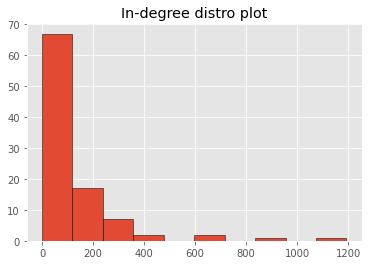

In [ ]:
#In-degree distro plot
plt.style.use('ggplot')
plt.title("In-degree distro plot")
_=plt.hist(indegrees, bins=10,edgecolor='black')

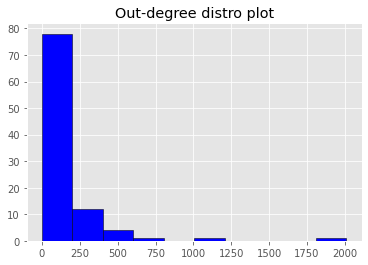

In [ ]:
#Out-degree distro plot
plt.style.use('ggplot')
plt.title("Out-degree distro plot")
_=plt.hist(outdegrees, bins=10,edgecolor='black', color="blue")

### Visual - 2

In [ ]:
from pyvis.network import Network
colnames=['u', 'v', 't'] 
tmp = pd.read_csv(r'C:\Users\alessio\Downloads\ADM-HW5\sx-stackoverflow-a2q.txt',names=colnames, sep=" ", header=None)
t = pd.to_datetime(tmp.iloc[:,2],unit="s").dt.strftime("%Y/%m/%d")
tmp["t"]=t

In [ ]:
#We took as periods the trimesters of year 2009  
from IPython.core.display import display, HTML
inputNode=74757 #select a node for our analysis
periods=[("2009/01/01","2009/03/31"),("2009/04/01","2009/06/30"),("2009/07/01","2009/09/30"),("2009/10/01","2009/12/31"),]
for start, end in periods: 
    timeInt=pd.date_range(start=datetime.strptime(start, '%Y/%m/%d'), end=datetime.strptime(end, '%Y/%m/%d')) #create a pandas date range
    tmpp=tmp[(tmp['t'] >= start) & (tmp['t'] <= end)] #subset the dataset using Views
    tmpp=tmpp[tmpp['u'] != tmpp['v']] #exclude self-loops
    listOfNodes = list(set(tmpp["u"].tolist()+tmpp["v"].tolist())) #generate the list of all nodes for each trimester
    graf=create_graph(tmpp) #generates the graph
    Gi = nx.DiGraph() #initialize a directed graph on networkx library
    for k, d in graf.items():
        for ik in d:
            d[ik] = {'weight': round(d[ik][0],3)} #format the structure of our dictionary-graph
    #outgoing - Red
    for node in [x for x in graf[inputNode]]: #add outgoing edges to the networkx graph
        Gi.add_edges_from([(inputNode, node)],weight=graf[inputNode][node]["weight"]*3, color="red") #*2 so that thickness changes become evident

    #ingoing - Green
    for node in [y for y in graf for x in graf[y] if x==inputNode]:#add ingoing edges to the networkx graph
        Gi.add_edges_from([(node, inputNode)], color='green', weight=graf[node][inputNode]["weight"]*3) #*2 so that thickness changes become evident

    #Neighbour ingoing - Yellow                           
    ls=[y for y in graf for x in graf[y] if x==inputNode] #add edges from nodes that are connected to inputNode through "green" edges
    for el in ls:
        for node in [x for x in graf for y in graf[x] if y==el]:
            Gi.add_edges_from([(node, el)], color='yellow', weight=graf[node][el]["weight"]) #*2 so that thickness changes become evident

    #Neighbour outgoing - Pink
    ls=[x for x in graf[inputNode] if x in graf] #add edges from nodes that are connected to nodes having "red" edges
    for el in ls:
        for node in [x for x in graf[el]]:
            Gi.add_edges_from([(el, node)], color='pink', weight=graf[el][node]["weight"]) #*2 so that thickness changes become evident        
    
    gg=Network(height='1080',width="1920",notebook=True, directed=True) 
    gg.from_nx(Gi) #generates a PyVis of Networkx graph
    gg.write_html("{}_{}.html".format(start[5:7],end[5:7]), notebook=False) #output images as html

#### Results

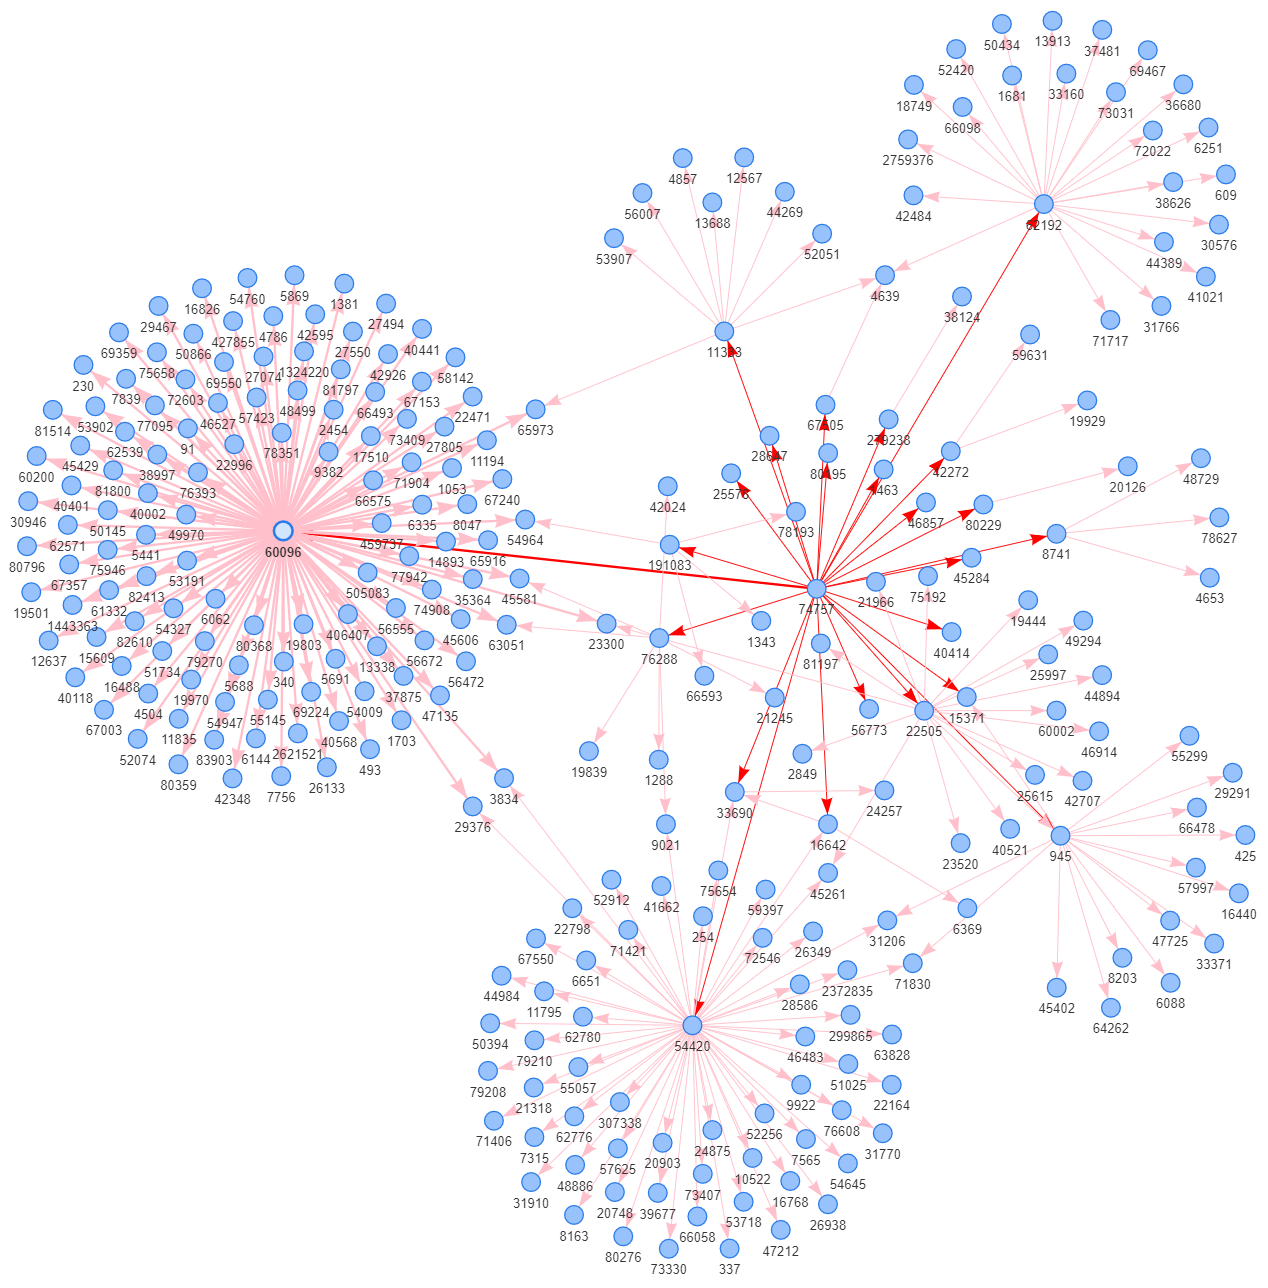

In [ ]:
from IPython.display import Image
Image(filename=r'C:\Users\alessio\Downloads\ADM-HW5\01_03.png') 

From the result we can see that the input node (i.e., 74757) is connected to two nodes with high out-degree (i.e., 60096 and 54420), but for this trimester it does not have any ingoing edges (represented with color green).

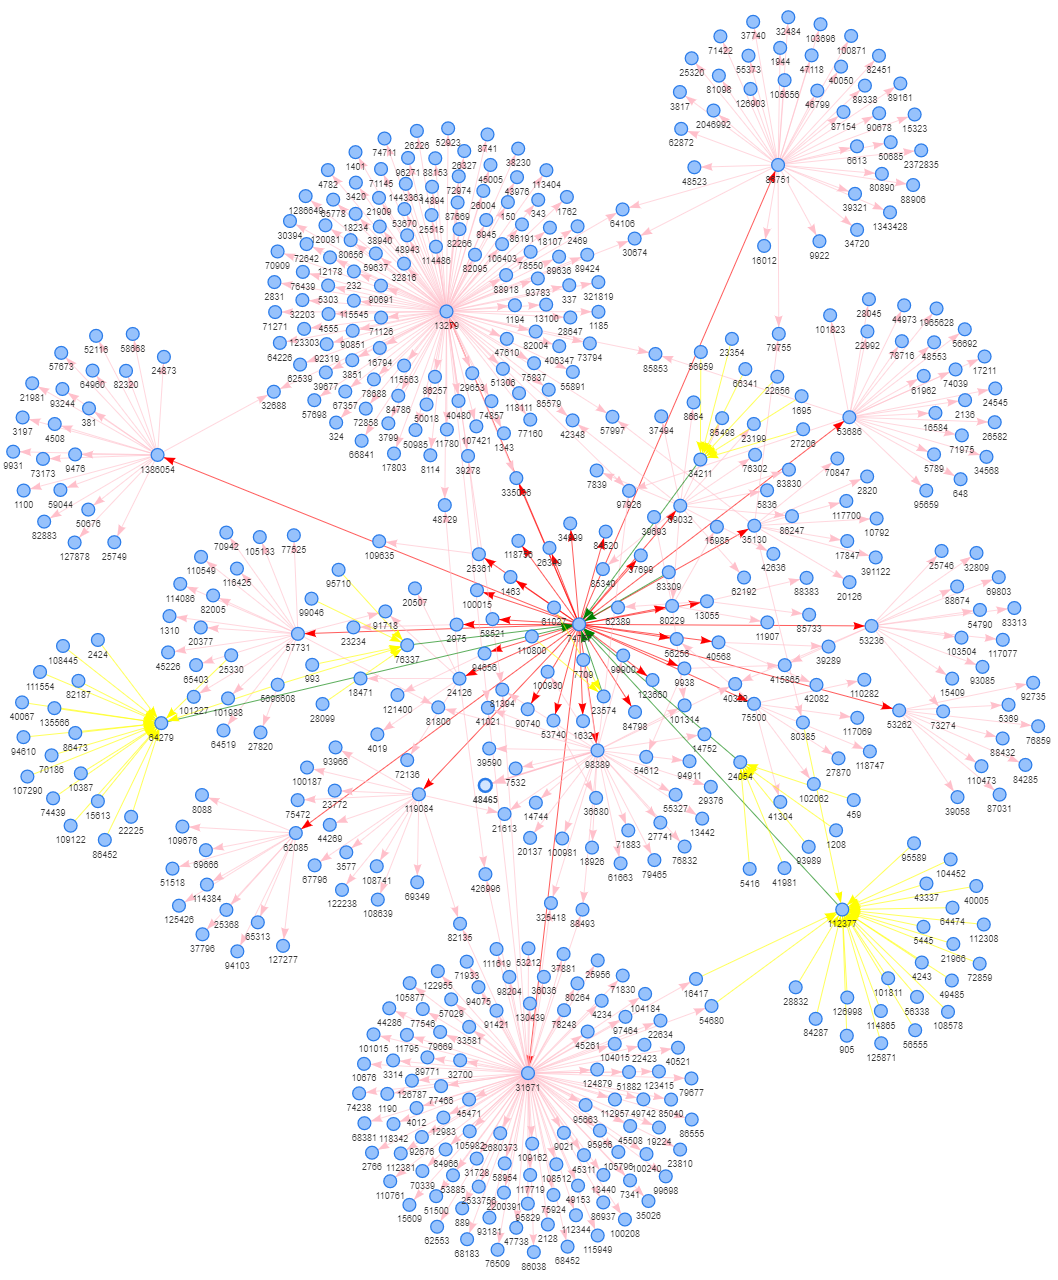

In [ ]:
from IPython.display import Image
Image(filename=r'C:\Users\alessio\Downloads\ADM-HW5\04_06.png') 

In the second trimester, there are many more connections, the nodes to which 74757 is directly connected (represented with red edges) appear to have important nodes in their outgoing neighborhood (represented with pink edges) as e.g., node 31671, 13279, etc. This time, the input node has some ingoing edges whose neighboring nodes are far less important than the other neighborhood.

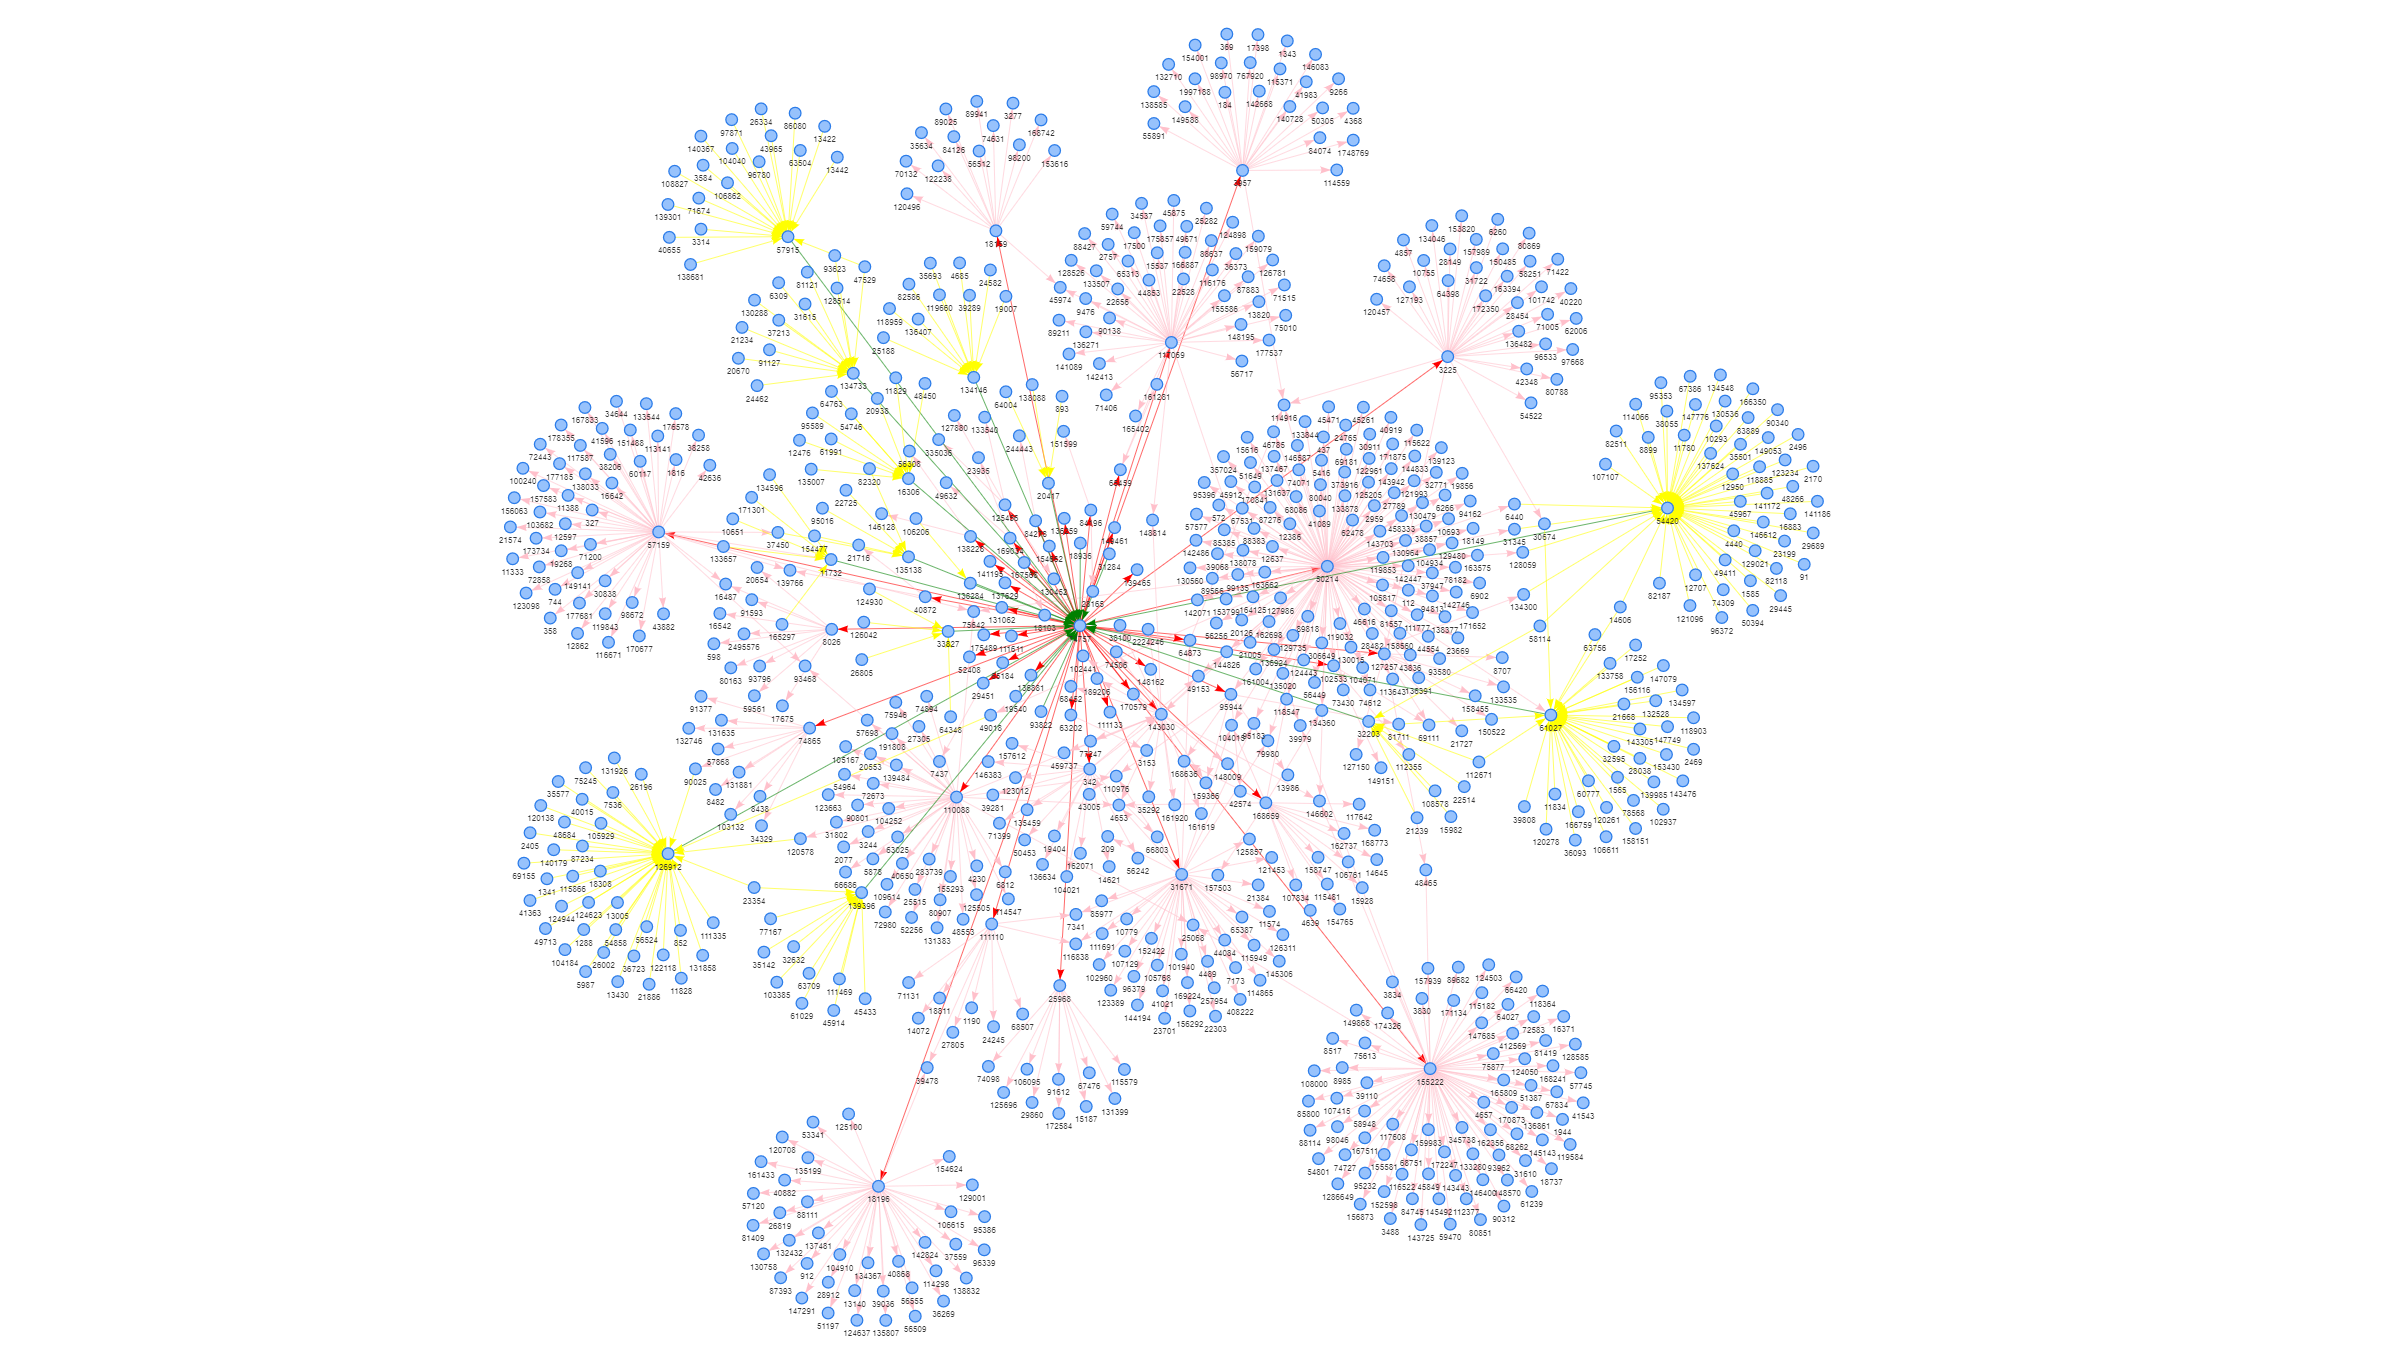

In [ ]:
from IPython.display import Image
Image(filename=r'C:\Users\alessio\Downloads\ADM-HW5\07_09.png') 

In the third trimester the overall graph is even bigger, there appears to be many important nodes both directly connected both in 74757 neighborhoods

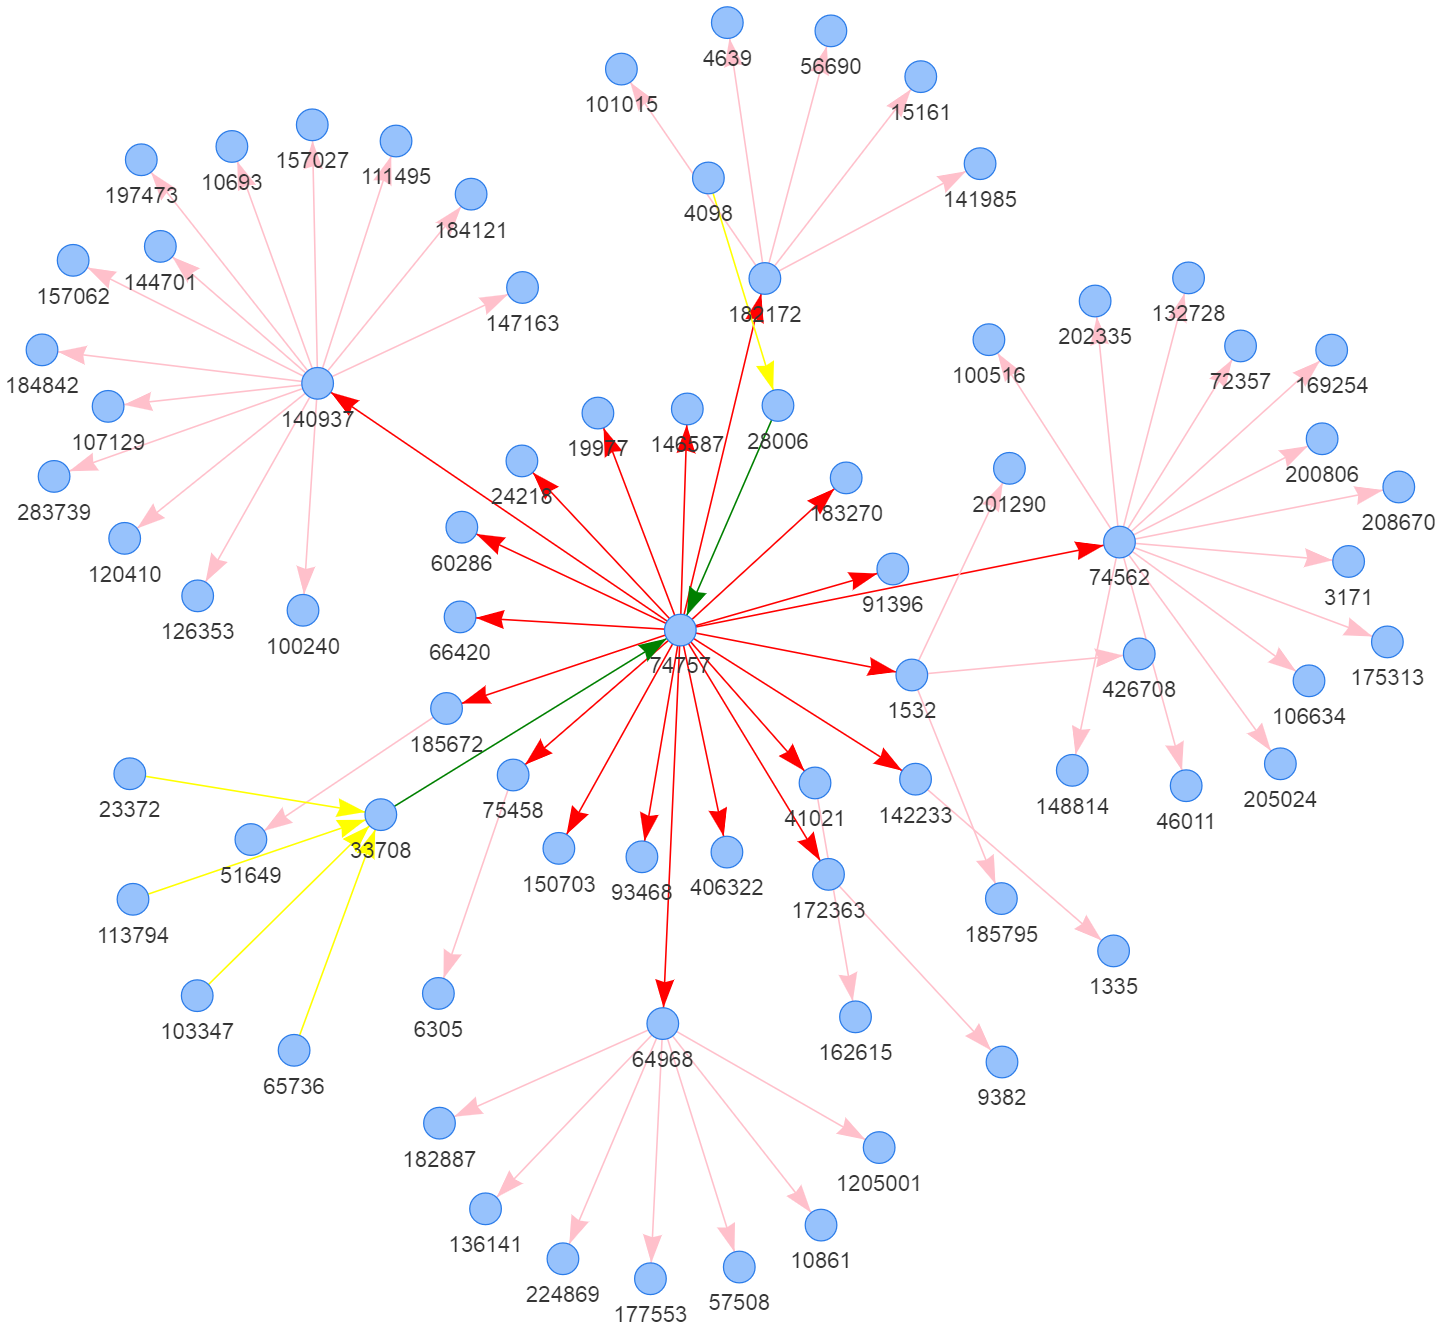

In [ ]:
from IPython.display import Image
Image(filename=r'C:\Users\alessio\Downloads\ADM-HW5\10_12.png') 

The last trimester of year 2009 is by far the one with less connections, once more the neighborhood of nodes to which 74757 is connected appears to be more important to the neighborhood of nodes connected to 74757.

### Visual - 3

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_shortest_ordered_route(graph,path):
  ## create the graph adding the nodes and edges from path obtained
  route=nx.Graph()
  route.add_nodes_from(path)
  edges = [(path[n],path[n+1]) for n in range(len(path)-1)]
  for e in edges:
    # set the weight as attribute of the edge
    weight = graph[e[0]][e[1]][0]
    route.add_edge(e[0],e[1],weight=round(weight,3))

  ## draw the route 
  plt.figure()
  # define the layout 
  pos = nx.spring_layout(route, k=20)
  nx.draw_networkx_nodes(route,pos=pos, node_size=[len(str(n)) * 300 for n in route.nodes()]) # nodes with the dimension set according to the size of label
  nx.draw_networkx_labels(route,pos=pos)
  nx.draw_networkx_edges(route,pos=pos,edgelist=edges,edge_color = 'r',  arrows=True, width=1.5)
  weights = nx.get_edge_attributes(route,'weight')
  nx.draw_networkx_edge_labels(route,pos,edge_labels=weights, verticalalignment="top", font_size=8) # draw the weights on edges


  plt.show()

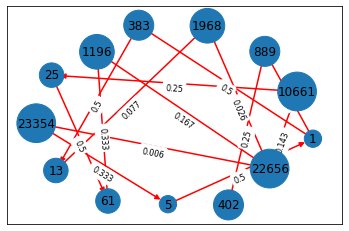

In [ ]:
visualize_shortest_ordered_route(merge,[1, 383, 13, 1968, 22656, 10661, 25, 61, 1196, 22656, 23354, 5, 1, 889, 402])

## Ex. 4

We used graphs to solve the problem, considering the pairs between fight children as edges.
Then see if an assignment to dormitories is possible we just check if there is a cycle in the graph.

Let's make an example to explain it:

if there is a cycle this means that for example there are this edges:

(1,2) - (2,4) - (4,1)

So reasoning as pairs of child that fight we can see that we have that everyone fights with all the others 2, so it's impossible to have a distribution in 2 dormitories

In [3]:
def dfs_found_cycle(visited, graph, node, parent, visited_from):
    if node not in visited:
        # visit the node and add to the dict the node you came from
        visited.add(node)
        visited_from[node] = parent
        if node in graph:
            # run it for every neighbour
            for neighbour in graph[node]:
                cycle = dfs_found_cycle(
                    visited, graph, neighbour, node, visited_from)
                # see if you found a cycle
                if cycle == True:
                    return True
    else:
        # if the node is already visited and it's not the one we came from, there is a cycle
        if node != visited_from[parent]:
            return True
    return False

In [4]:
def ex_4(n, pairs):
    graph = dict()
    # considering the pairs as edges and create the undirected graph
    for p in pairs:
        if p[0] in graph:
            graph[p[0]].add(p[1])
        else:
            graph[p[0]] = {p[1]}
        if p[1] in graph:
            graph[p[1]].add(p[0])
        else:
            graph[p[1]] = {p[0]}
    # run the function to find cycles
    if dfs_found_cycle(set(), graph, 1, -1, dict()):
        print("assignment not possible")
    else:
        # assign child to dormitories and give a possible solution
        dorm1 = set()
        dorm2 = set()
        for i in range(1, n):
            if i not in graph:
                dorm1.add(i)
            else:
                if i in dorm1:
                    dorm2.update(graph[i])
                else:
                    dorm2.add(i)
                    dorm1.update(graph[i])
        print("dorm 1: ", dorm1, " dorm 2: ", dorm2)

Example with possible assignment

In [5]:
ex_4(6, [(2, 1), (1, 2), (4, 2), (3, 1), (5, 6), (4, 5)])

dorm 1:  {2, 3, 5}  dorm 2:  {1, 4, 6}


Example without any possible assignment

In [6]:
ex_4(5, [(3, 1), (1, 2), (3, 2), (4, 3), (1, 5)])

assignment not possible


# Visualization - 4

In [23]:
import networkx as nx
from pyvis.network import Network
Gi = nx.DiGraph() #initialize a directed graph on networkx library
for k, d in g1.items():
    for ik in d:
        d[ik] = {'weight': round(d[ik][0],3)} #format the structure of our dictionary-graph

#Edges to be removed
output=[(9, 72), (9, 404), (9, 26), (9, 1693), (9, 2424), (9, 13611), (17, 48)]
for el in output:
    try:
        Gi.add_edges_from([(el[0], el[1])],weight=g1[el[0]][el[1]]["weight"], color="red") #*2 so that thickness changes become evident
    except Exception: continue
#All other edges
for x in g1:
    for y in g1[x]:
        if (x, y) in output: continue
        Gi.add_edges_from([(x, y)],weight=g1[x][y]["weight"], color="yellow") #*2 so that thickness changes become evident
    
gg=Network(height='1080',width="1920",notebook=True, directed=True) 
gg.from_nx(Gi) #generates a PyVis of Networkx graph
gg.write_html("visual_4.html", notebook=False)

In [ ]:
from IPython.display import Image
Image(filename=r'C:\Users\alessio\Downloads\ADM-HW5\v4.png') 